# Part I - Prosper Loan Analysis
## by Mattias Johansson

## Introduction
"This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others." - https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
os.listdir("data")
df = pd.read_csv("data/prosperLoanData.csv")
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df = df[["ListingKey","ListingNumber","ListingCreationDate","Term","LoanStatus","LoanNumber","BorrowerAPR","BorrowerRate","LenderYield","BorrowerState","Occupation","EmploymentStatus","EmploymentStatusDuration","IsBorrowerHomeowner","DateCreditPulled","CreditScoreRangeLower","CreditScoreRangeUpper","FirstRecordedCreditLine","DebtToIncomeRatio","IncomeRange","StatedMonthlyIncome","LoanKey","LoanMonthsSinceOrigination","LoanOriginalAmount","LoanOriginationDate","LoanOriginationQuarter","MonthlyLoanPayment","PercentFunded","Recommendations","InvestmentFromFriendsCount","InvestmentFromFriendsAmount","Investors"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ListingKey                   113937 non-null  object 
 1   ListingNumber                113937 non-null  int64  
 2   ListingCreationDate          113937 non-null  object 
 3   Term                         113937 non-null  int64  
 4   LoanStatus                   113937 non-null  object 
 5   LoanNumber                   113937 non-null  int64  
 6   BorrowerAPR                  113912 non-null  float64
 7   BorrowerRate                 113937 non-null  float64
 8   LenderYield                  113937 non-null  float64
 9   BorrowerState                108422 non-null  object 
 10  Occupation                   110349 non-null  object 
 11  EmploymentStatus             111682 non-null  object 
 12  EmploymentStatusDuration     106312 non-null  float64
 13 

In [5]:
# We filter out the nan values to work with a complete dataset. This may affect the analysis
pd.set_option('display.max_columns', None)
df = df.dropna()
df[0:50]

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,LoanNumber,BorrowerAPR,BorrowerRate,LenderYield,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanKey,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,19141,0.16516,0.1580,0.1380,CO,Other,Self-employed,2.0,True,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,0.17,"$25,000-49,999",3083.333333,E33A3400205839220442E84,78,9425,2007-09-12 00:00:00,Q3 2007,330.43,1.0000,0,0,0.00,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,134815,0.12016,0.0920,0.0820,CO,Professional,Employed,44.0,False,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,0.18,"$50,000-74,999",6125.000000,9E3B37071505919926B1D82,0,10000,2014-03-03 00:00:00,Q1 2014,318.93,1.0000,0,0,0.00,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,77296,0.12528,0.0974,0.0874,GA,Skilled Labor,Employed,113.0,True,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,0.15,"$25,000-49,999",2875.000000,A0393664465886295619C51,16,10000,2012-11-01 00:00:00,Q4 2012,321.45,1.0000,0,0,0.00,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,102670,0.24614,0.2085,0.1985,MN,Executive,Employed,44.0,True,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,0.26,"$100,000+",9583.333333,A180369302188889200689E,6,15000,2013-09-20 00:00:00,Q3 2013,563.97,1.0000,0,0,0.00,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,60,Current,123257,0.15425,0.1314,0.1214,NM,Professional,Employed,82.0,True,2013-12-14 08:26:40,740.0,759.0,1973-03-01 00:00:00,0.36,"$100,000+",8333.333333,C3D63702273952547E79520,3,15000,2013-12-24 00:00:00,Q4 2013,342.37,1.0000,0,0,0.00,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,36,Current,88353,0.31032,0.2712,0.2612,KS,Sales - Retail,Employed,172.0,False,2013-04-12 09:52:53,680.0,699.0,2000-09-29 00:00:00,0.27,"$25,000-49,999",2083.333333,CE963680102927767790520,11,3000,2013-04-18 00:00:00,Q2 2013,122.67,1.0000,0,0,0.00,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,36,Current,90051,0.23939,0.2019,0.1919,CA,Laborer,Employed,103.0,False,2013-05-05 06:49:25,700.0,719.0,1999-02-25 00:00:00,0.24,"$25,000-49,999",3355.750000,0C87368108902149313D53B,10,10000,2013-05-13 00:00:00,Q2 2013,372.60,1.0000,0,0,0.00,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,36,Current,121268,0.07620,0.0629,0.0529,IL,Food Service,Employed,269.0,True,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,0.25,"$25,000-49,999",3333.333333,02163700809231365A56A1C,3,10000,2013-12-12 00:00:00,Q4 2013,305.54,1.0000,0,0,0.00,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,36,Current,121268,0.07620,0.0629,0.0529,IL,Food Service,Employed,269.0,True,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,0.25,"$25,000-49,999",3333.333333,02163700809231365A56A1C,3,10000,2013-12-12 00:00:00,Q4 2013,305.54,1.0000,0,0,0.00,1
10,0F123545674891886D9F106,587746,2012-05-10 07:04:01.577000000,60,Current,65946,0.27462,0.2489,0.2389,MD,Fireman,Employed,300.0,False,2012-04-22 08:38:09,640.0,659.0,1989-11-29 00:00:00,0.12,"$75,000-99,999",7500.000000,7C083651269973612460D6D,22,13500,2012-05-17 00:00:00,Q2 2012,395.37,1.0000,0,0,0.00,19


### What is the structure of your dataset?

> The dataset contains quantitative and qualitative variables together with ordinal, categorical and interval variables, where a lot of the variables have missing values. Some of the missing values is present as they were not applicable for loans that originated before july 2009, together with missing input data related to not applicable values for certain categories. 

### What is/are the main feature(s) of interest in your dataset?

> The features of interest is specifically focused on the loan, mortgage & interest, income related variables, life situation(e.g., occupation/employment status), where the loan heritages from etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following table presents the selected variables. Initially not all will be used, as its to much to process for this report, but for documentation i will explore and try to narrow the table down.

| Variables                   	|   	|
|-----------------------------	|---	|
| ListingKey                  	|   	|
| ListingNumber               	|   	|
| ListingCreationDate         	|   	|
| Term                        	|   	|
| LoanStatus                  	|   	|
| LoanNumber                  	|   	|
| BorrowerAPR                 	|   	|
| BorrowerRate                	|   	|
| LenderYield                 	|   	|
| BorrowerState               	|   	|
| Occupation                  	|   	|
| EmploymentStatus            	|   	|
| EmploymentStatusDuration    	|   	|
| IsBorrowerHomeowner         	|   	|
| DateCreditPulled            	|   	|
| CreditScoreRangeLower       	|   	|
| CreditScoreRangeUpper       	|   	|
| FirstRecordedCreditLine     	|   	|
| DebtToIncomeRatio           	|   	|
| IncomeRange                 	|   	|
| StatedMonthlyIncome         	|   	|
| LoanKey                     	|   	|
| LoanMonthsSinceOrigination  	|   	|
| LoanOriginalAmount          	|   	|
| LoanOriginationDate         	|   	|
| LoanOriginationQuarter      	|   	|
| MonthlyLoanPayment          	|   	|
| PercentFunded               	|   	|
| Recommendations             	|   	|
| InvestmentFromFriendsCount  	|   	|
| InvestmentFromFriendsAmount 	|   	|
| Investors                   	|   	|

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

## Question: 

> How is the original loan amount distributed?

## Visualization

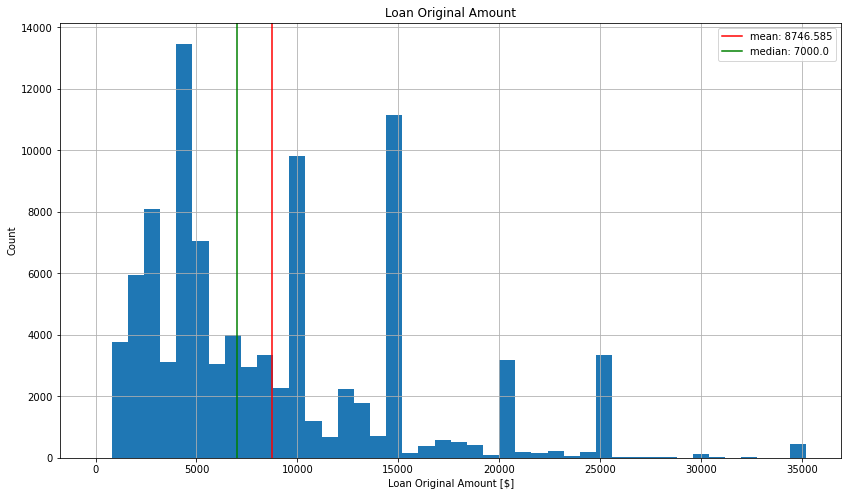

In [6]:
def histo(df, binsize, column, xlabel, ylabel, title):
    binsize = binsize
    bins = np.arange(0, df[column].max()+binsize, binsize)
    plt.figure(figsize=[14, 8])
    hist = plt.hist(data = df, x = column, bins = bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.axvline(np.mean(df[column]),color = "red",label = f"mean: {np.round(np.mean(df[column]),3)}")
    plt.axvline(np.median(df[column]),color = "green",label = f"median: {np.round(np.median(df[column]),3)}")
    plt.grid()
    plt.legend()
    plt.show()
    
histo(df=df, binsize = 800, column = "LoanOriginalAmount", xlabel = "Loan Original Amount [$]", ylabel = "Count", title = "Loan Original Amount")

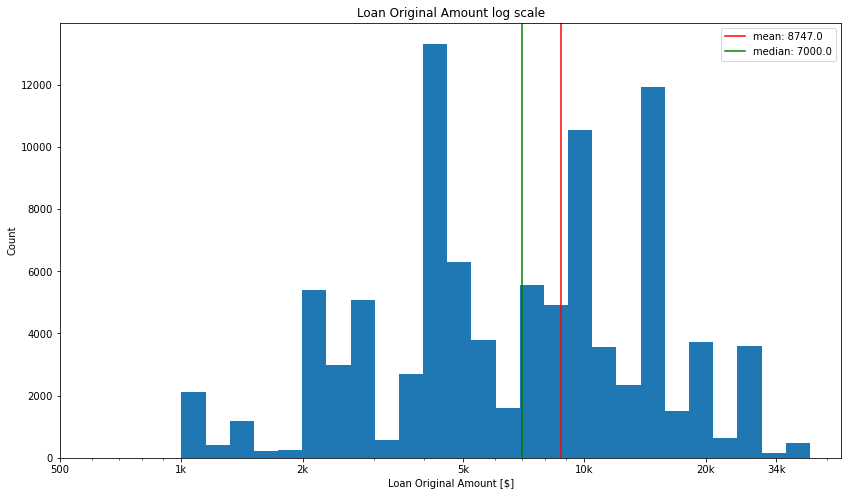

In [7]:
# Plot in log to easier see the distribution
def histo_log(df, column, xticks, xticks_name, xlabel, ylabel, title):
    log_binsize = 0.06
    bins = 10 ** np.arange(3, np.log10(df[column].max())+log_binsize, log_binsize)
    plt.figure(figsize=[14, 8])
    plt.hist(data = df, x = column, bins = bins)
    plt.xscale('log')
    plt.axvline(np.mean(df[column]),color = "red", label = f"mean: {np.round(np.mean(df[column]))}")
    plt.axvline(np.median(df[column]),color = "green",label = f"median: {np.round(np.median(df[column]))}")
    plt.xticks(xticks, xticks_name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
    
histo_log(df = df, column = "LoanOriginalAmount", xticks =[500, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4], xticks_name=[500, '1k', '2k', '5k', '10k', '20k',"34k"], xlabel="Loan Original Amount [$]", ylabel= "Count", title="Loan Original Amount log scale")

### Observation

> We observe several densities around 5000, 10000, 15000, 20000, 25000 where a majority of the original loans are located.

> The log scaling visualizes the distibution as there are a relatively large right-tail

> The average is 8747 dollars loan at the original amount, and the median is 7000. Note that we must understand that we have larger distibutions in some specific areas, as mentioned before. 


## Question: 

> What is the distribution for the "outlier" / Large original loan takers related to Occupation, LoanStatus and EmploymentStatus?


## Visualization

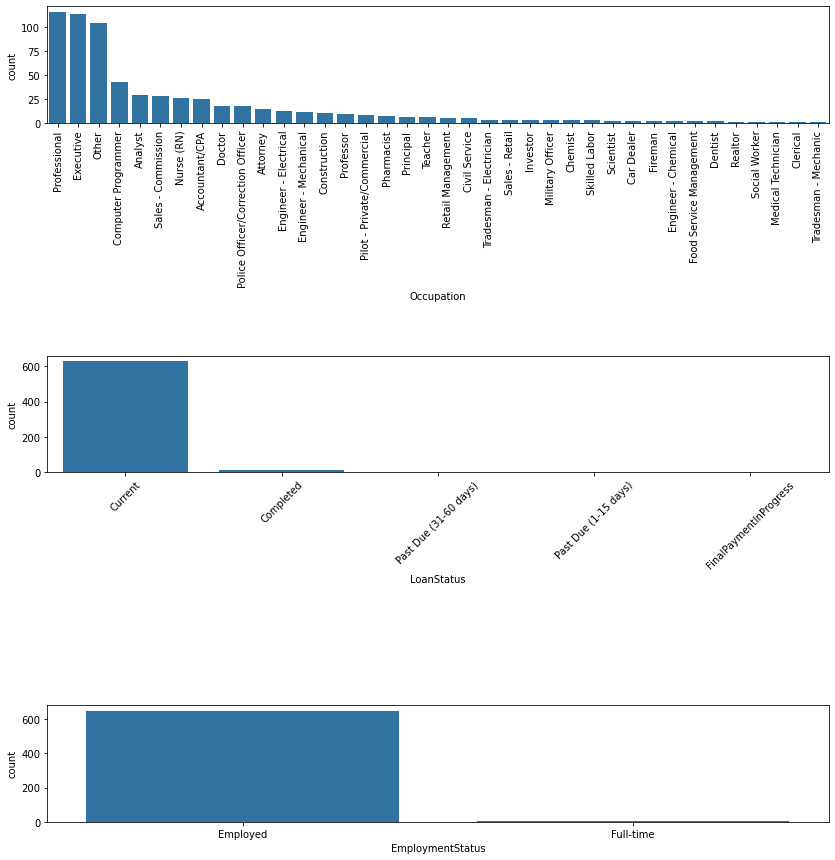

In [8]:
# Filtering on the larger original amount and looking at those cases
df_outliers = df[df["LoanOriginalAmount"] > 27000].copy()

def subplot_histogram_categorical(df):
    fig, ax = plt.subplots(nrows=3, figsize = [14,15])
    default_color = sb.color_palette()[0]
    plt.subplots_adjust(hspace=2)
    plot1 = sb.countplot(data = df, x = 'Occupation', color = default_color, ax = ax[0], order = df['Occupation'].value_counts().index)
    plot2 = sb.countplot(data = df, x = 'LoanStatus', color = default_color, ax = ax[1], order = df['LoanStatus'].value_counts().index)
    plot3 = sb.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax[2], order = df['EmploymentStatus'].value_counts().index)
    plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
    plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45)
    plot3.set_xticklabels(plot3.get_xticklabels(), rotation=0)
    plt.show()
    
subplot_histogram_categorical(df_outliers)

### Observation

> We observe when filtering large loan takers that all of them do have an employment of any kind. Mostly the also have these loans as active and the top Occupations are Professional, Excecutive, Other, Computer Programmer, and Analyst

## Question: 

> What is the distibution of the occupation, Loanstatus and employment status?


## Visualization

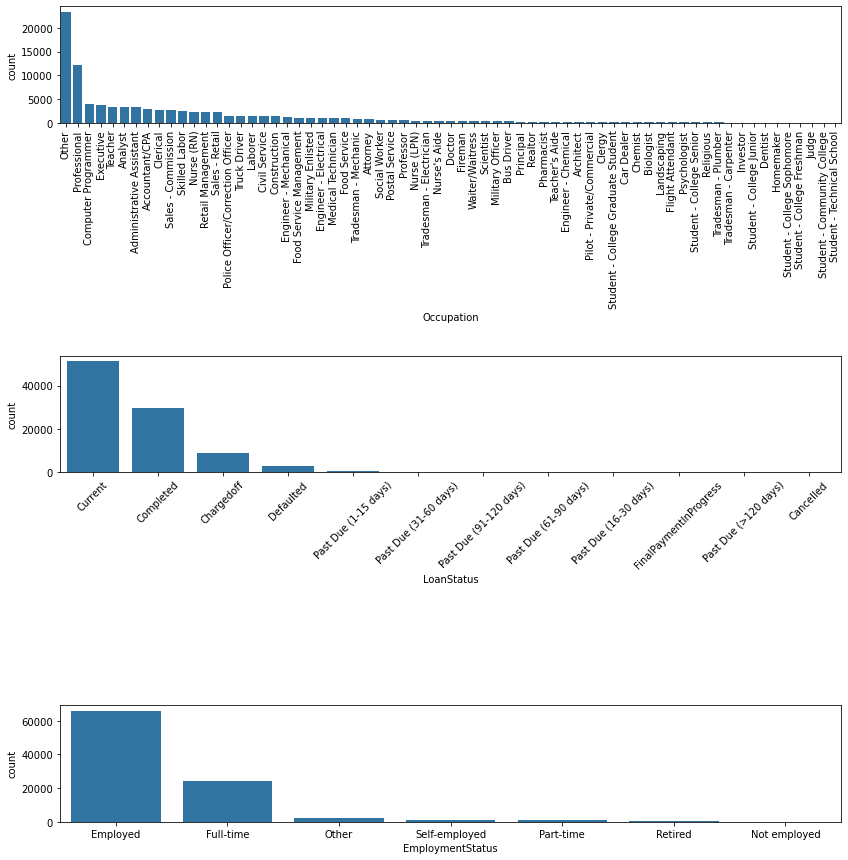

In [9]:
# Using the same function as before
subplot_histogram_categorical(df)

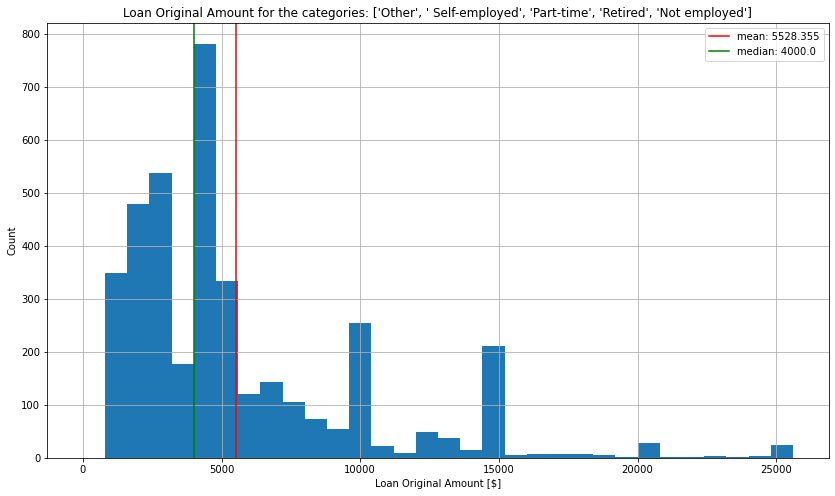

In [10]:
# Looking at the least occuring employment status and visualizing the distribution
cols = ["Other"," Self-employed","Part-time", "Retired","Not employed"]
df_employmentstatus = df[df["EmploymentStatus"].isin(cols)].copy()
histo(df=df_employmentstatus, binsize = 800, column = "LoanOriginalAmount", xlabel = "Loan Original Amount [$]", ylabel = "Count", title = f"Loan Original Amount for the categories: {cols}")

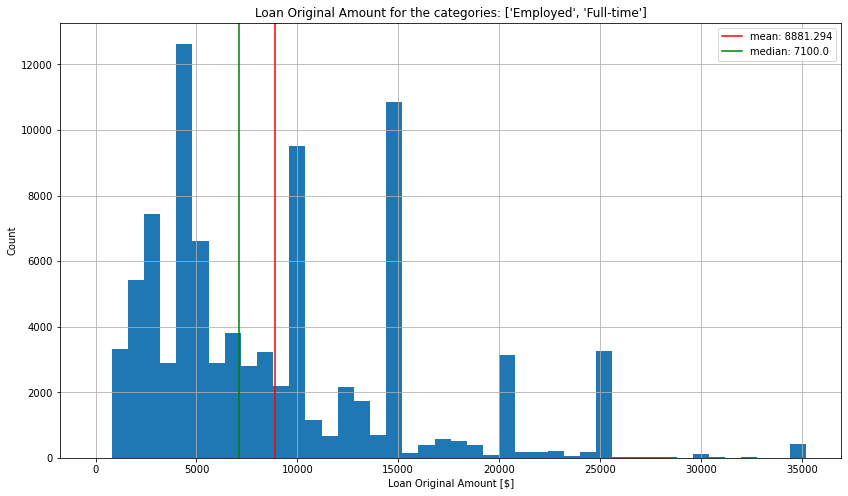

In [11]:
# Looking at the most occuring employment status and visualizing the distribution
cols = ["Employed", "Full-time"]
df_employmentstatus_full = df[df["EmploymentStatus"].isin(cols)].copy()
histo(df=df_employmentstatus_full, binsize = 800, column = "LoanOriginalAmount", xlabel = "Loan Original Amount [$]", ylabel = "Count", title = f"Loan Original Amount for the categories: {cols}")

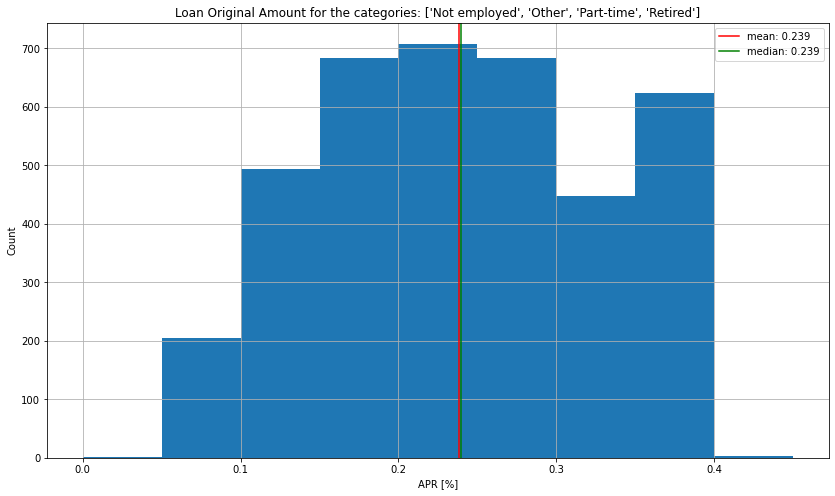

In [12]:
# Looking at the Borrower APR for the least occuring employments
histo(df=df_employmentstatus, binsize = 0.05, column = "BorrowerAPR", xlabel = "APR [%]", ylabel = "Count", title = f"Loan Original Amount for the categories: {list(set(df_employmentstatus.EmploymentStatus))}")

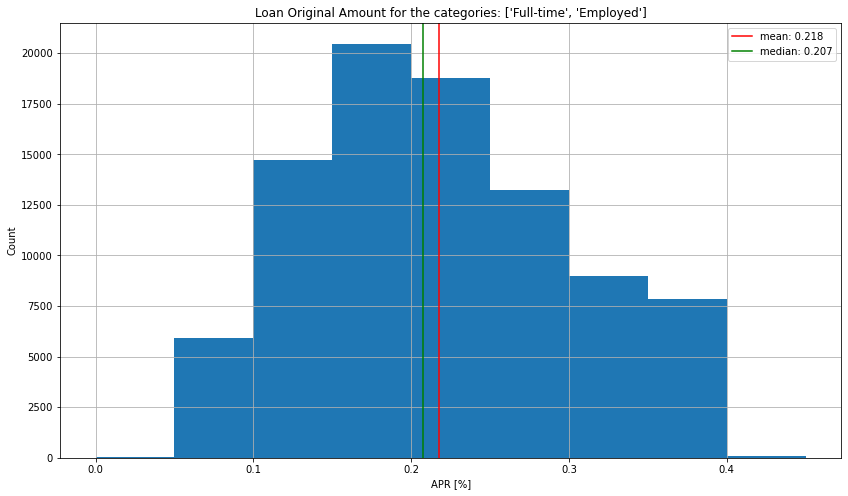

In [13]:
# Looking at the Borrower APR for the full-time employments 
histo(df=df_employmentstatus_full, binsize = 0.05, column = "BorrowerAPR", xlabel = "APR [%]", ylabel = "Count", title = f"Loan Original Amount for the categories: {list(set(df_employmentstatus_full.EmploymentStatus))}")

### Observation

> The non-informational category "Other" in the "Occupation" variable are among the top loan takers in this dataset. The category Professional, Computer programmer, Executive, Teacher and Analyst are among the top 5 loan takers.

> The majority of the status of the loans are "Current" and "Completed".

> Most of the loan takers are employed and/or working full-time. 

> The mean loan of the least occuring employment statuses is 5528 while the median is 4000. This is near half of the categories of the employed categorized loans

> The mean APR of the least occuring employment statuses is lower than the employed loan takers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Using parts of the Example notebook i transformed the quantative data of the original loans to log scale, to visualize the distribution. This gave me some insights on the "outliers", or atleast the higher loans that are present in the dataset. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> The variables used in the univariate exploration is: **LoanOriginalAmount**, **Occupation**, **LoanStatus**, **EmploymentStatus**, **BorrowerAPR**

## Question

> Is there any correlation between the mean Loan Original Amount and the EmploymentStatus/LoanStatus?

## Visualization

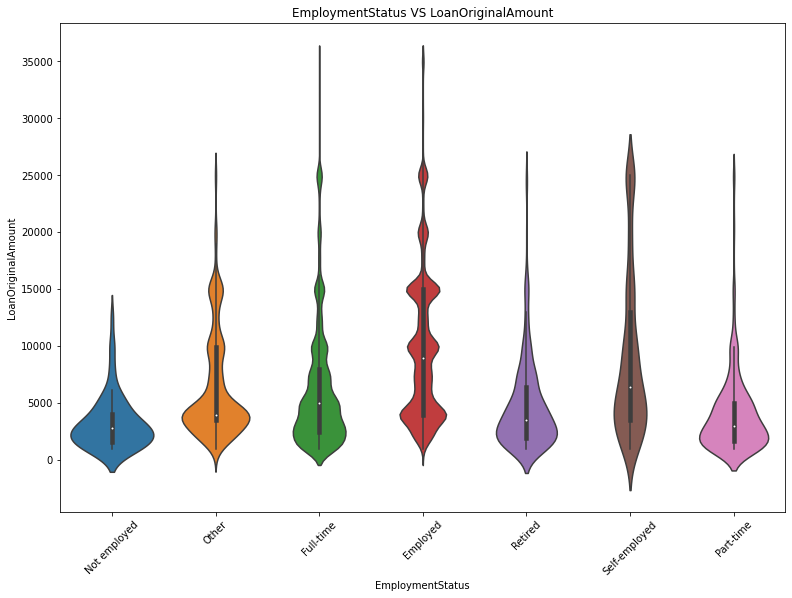

In [46]:
df_bivariate = df.copy()

def violin_plot(df, col_num, col_cat, title):
    vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=list(set(df_bivariate[col_cat])))
    df[col_cat] = df[col_cat].astype(vclasses);
    plt.figure(figsize = (13,9))
    plt.title(title)
    plot1 = sb.violinplot(data=df, x=col_cat, y=col_num);
    plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)

violin_plot(df = df_bivariate, col_num = "LoanOriginalAmount", col_cat = "EmploymentStatus", title = "EmploymentStatus VS LoanOriginalAmount")

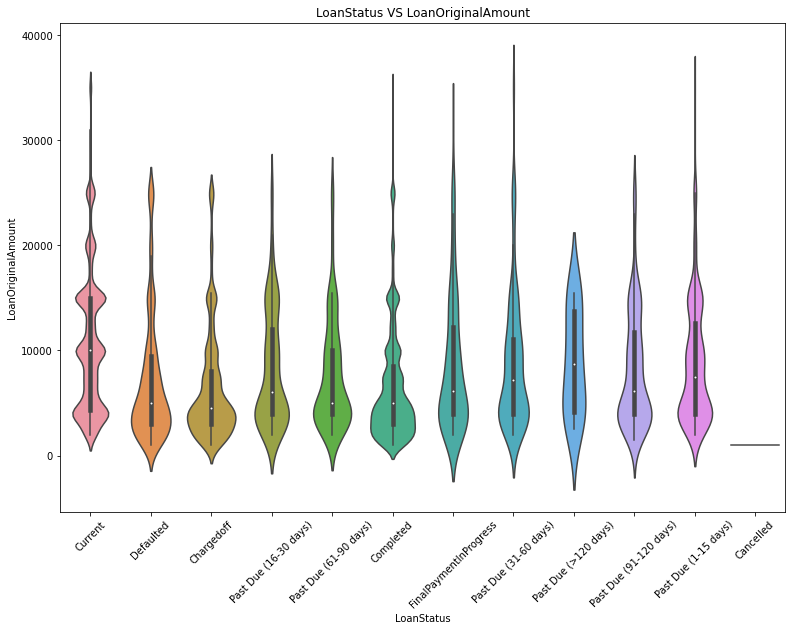

In [44]:
violin_plot(df = df_bivariate, col_num = "LoanOriginalAmount", col_cat = "LoanStatus", title = "LoanStatus VS LoanOriginalAmount")

## Observation

> First glance, verifying what we saw in the univariate exploration we can see that those that are employed have a larger variance, or spans, to a larger Original Loan compared to those who does not. 

> The distribution for the current loan status is more fragmented and have more local distributions among the numerical axis than the rest.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

